In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# load dataset
dataset= load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [63]:
# get only jobs in th US

us_data_jobs = df[df['job_country'] == 'United States'].copy()

In [64]:
# extract the month

us_data_jobs['job_posted_month'] = us_data_jobs['job_posted_date'].dt.strftime('%B')

In [65]:
# create pivot table

df_us_pivot = us_data_jobs.pivot_table(
    index= 'job_posted_month',
    columns= 'job_title_short',
    aggfunc= 'size'
)

In [66]:
df_us_pivot.reset_index(inplace=True)

In [68]:
df_us_pivot['month_number'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month

In [70]:
# sort month number
df_us_pivot.sort_values('month_number', inplace=True)

In [72]:
df_us_pivot.set_index('job_posted_month', inplace=True)

In [73]:
df_us_pivot.drop(columns = 'month_number' , inplace=True)

In [79]:
top_three_jobs  = us_data_jobs['job_title_short'].value_counts().head(3).index
top_three_jobs = top_three_jobs.to_list()

In [80]:
top_three_jobs

['Data Analyst', 'Data Scientist', 'Data Engineer']

Text(0.5, 0, '')

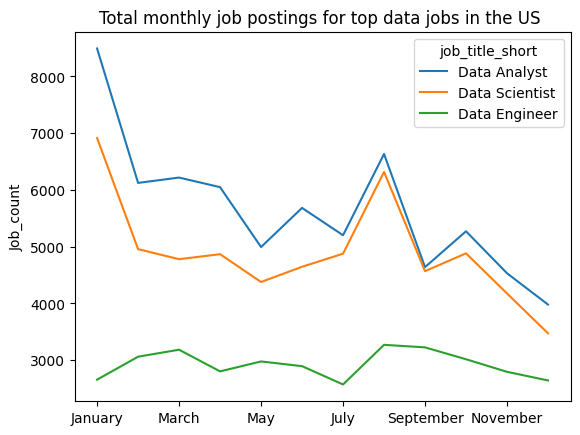

In [82]:
df_us_pivot[top_three_jobs].plot(kind='line')

plt.title('Total monthly job postings for top data jobs in the US ')
plt.ylabel('Job_count')
plt.xlabel('')
